<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Assignment/Assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras import layers
from keras import models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import glob
import cv2

In [ ]:
'''
root_dir = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training'

Training_Fire_FileNames = os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/Fire')
Training_noFire_FileNames = os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/No_Fire')
np.random.shuffle(Training_Fire_FileNames)
np.random.shuffle(Training_noFire_FileNames)
print(len(Training_Fire_FileNames))
print(len(Training_noFire_FileNames))
print(len(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Val/Fire')))
print(len(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Val/No_Fire')))
'''

25018
14357
0
0


In [ ]:
'''
splitfolders.ratio('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/Fire', output='/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Val/Fire', seed=1337, ratio=(.8, .2), group_prefix=None) # default values
splitfolders.ratio('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/No_Fire', output='/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Val/No_Fire', seed=1337, ratio=(.8, .2), group_prefix=None)
'''


Copying files: 0 files [00:07, ? files/s]

Copying files: 0 files [00:04, ? files/s]


In [2]:
train_path = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training'
test_path = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test'

train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), batch_size=20, class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(train_path, target_size=(227,227), batch_size=20, class_mode='binary', subset='validation')

Found 11486 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


In [4]:
train_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/*/*.jpg')
train_Fire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/Fire/*.jpg')
train_noFire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/No_Fire/*.jpg')

print("Total number of training images: ", len(train_image_names))
print("number of Fire images: ", len(train_Fire_image_names))
print("number of No Fire images: ", len(train_noFire_image_names))

Total number of training images:  39375
number of Fire images:  25018
number of No Fire images:  14357


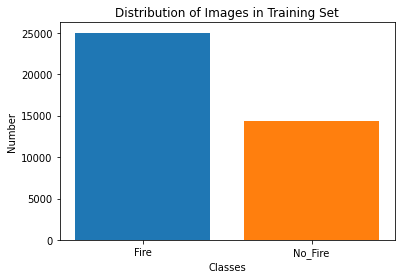

In [6]:
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training')[0], len(train_Fire_image_names))
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training')[1], len(train_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Training Set")
plt.show()

In [7]:
type(train)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [8]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [9]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
#print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (20, 227, 227, 3)
Batch Size for Output Image :  (20,)
Image Size of first image :  (227, 227, 3)


Text(0.5, 1.0, '1.0')

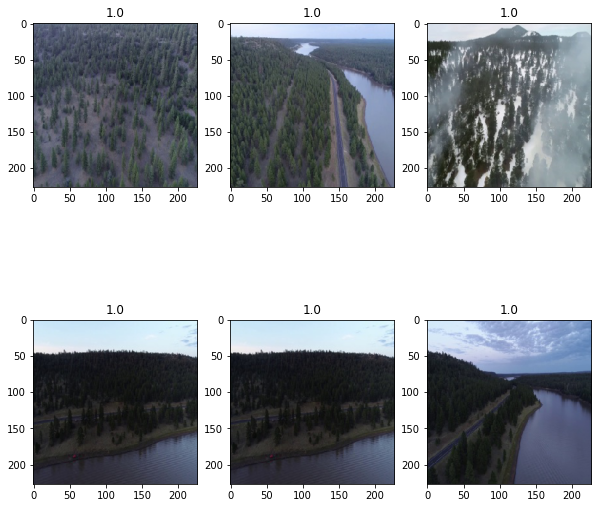

In [10]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][19])
axs[1][0].set_title(train[0][1][19])
axs[1][1].imshow(train[0][0][19])
axs[1][1].set_title(train[0][1][19])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
'''def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model
    '''

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (11, 11), activation='relu', input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
#optimizer=optimizers.RMSprop(lr=1e-4)
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 217, 217, 32)      11648     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 68, 68, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 256)       295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 512)      

In [ ]:
history = model.fit_generator(train, steps_per_epoch=100, epochs=3,
                              validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
100/100 [==============================] - 1964s 20s/step - loss: 0.2601 - accuracy: 1.0000 - val_loss: 10.1756 - val_accuracy: 0.4030
Epoch 2/3
 52/100 [==============>...............] - ETA: 8:19 - loss: 3.3246e-04 - accuracy: 1.0000

In [ ]:
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

Training accuracy:  0.9714999794960022
Training loss:  0.0945863276720047
Validation accuracy:  0.9459999799728394
Validation loss:  0.3346445560455322


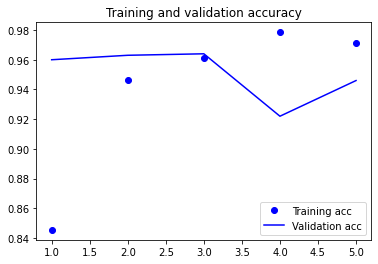

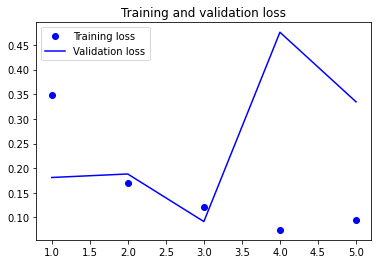

In [ ]:
print("Training accuracy: ", acc)
print("Training loss: ", loss)

print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

# Plotting the graphs to visualize the trend of accuracy and loss

epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
#alex = AlexNet(train[0][0].shape[1:])

In [ ]:
#alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation_15 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
#alex.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

In [ ]:
#history = alex.fit(train, epochs=2)

Epoch 1/2
   2/1231 [..............................] - ETA: 4:47:50 - loss: 18.1930 - accuracy: 0.6953

KeyboardInterrupt: ignored

In [ ]:
#history = alex.fit_generator(train,epochs=1)#

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

Next we will evaluate our model on test data

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(test_path, target_size=(227,227), batch_size=20, class_mode='binary')

Found 8617 images belonging to 2 classes.


In [ ]:
preds = model.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 1.5200839042663574
Test Accuracy = 0.6219101548194885
